In [4]:
import pandas as pd
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path_csv_train = 'drive/MyDrive/Datasets/train.csv'
train = pd.read_csv(path_csv_train)
train.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [7]:
path_csv_test = 'drive/MyDrive/Datasets/test.csv'
test = pd.read_csv(path_csv_test)
test.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10048,964141995,L,MLO,62.0,0,0,0,NaN,0,NaN,29,False
1,2,10048,1234933874,L,CC,62.0,0,0,0,NaN,0,NaN,29,False
2,2,10048,1577142909,R,MLO,62.0,0,0,0,NaN,0,NaN,29,False
3,2,10048,1842203124,R,CC,62.0,0,0,0,NaN,0,NaN,29,False
4,2,10050,588678397,L,MLO,67.0,0,0,0,NaN,0,NaN,29,False


In [8]:
path_images = 'drive/MyDrive/Datasets/archive'

In [ ]:
def get_filenames(path):
  filenames = set()
  for root, dirs, files in os.walk(path):
    for file in files:
      filenames.add(os.path.splitext(file)[0])
  return filenames

files_low_res = get_filenames(path_images)
len(files_low_res)

In [ ]:
def check_missing_images(image_ids):
    missing_images = []

    for id in image_ids:
        if str(id) not in files_low_res:
            missing_images.append(id)

    return missing_images

assert (check_missing_images(train['image_id'].values) == []), "Há imagem faltando no conjunto de treino"
assert (check_missing_images(test['image_id'].values) == []), "Há imagem faltando no conjunto de teste"

In [9]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  10962 non-null  int64  
 1   patient_id               10962 non-null  int64  
 2   image_id                 10962 non-null  int64  
 3   laterality               10962 non-null  object 
 4   view                     10962 non-null  object 
 5   age                      10949 non-null  float64
 6   cancer                   10962 non-null  int64  
 7   biopsy                   10962 non-null  int64  
 8   invasive                 10962 non-null  int64  
 9   BIRADS                   5327 non-null   float64
 10  implant                  10962 non-null  int64  
 11  density                  5796 non-null   object 
 12  machine_id               10962 non-null  int64  
 13  difficult_negative_case  10962 non-null  bool   
dtypes: bool(1), float64(2)

In [10]:
def check_dataset(dataset):
    total_cases = len(dataset)
    positive_cases = 0

    positive_cases = sum(filter(lambda d: d, dataset['cancer']))
    invasive_cases = sum(filter(lambda d: d, dataset['invasive']))
    missing_birads = len(list(filter(lambda d: pd.isna(d) or d == 0.0, dataset['BIRADS'])))
    missing_density = len(list(filter(lambda d: pd.isna(d), dataset['density'])))

    print (f'Total: {total_cases}')
    print (f'Positivos: {positive_cases}, {(positive_cases/total_cases*100):.2f}%')
    print (f'Invasivos: {positive_cases}, {(invasive_cases/total_cases*100):.2f}%')
    print (f'BIRADS faltantes ou incompletos: {missing_birads}, {(missing_birads/total_cases*100):.2f}%')
    print (f'Densidade faltantes: {missing_density}, {(missing_density/total_cases*100):.2f}%')

print ("Conjunto de Treino")
check_dataset(train)
print("\n")
print ("Conjunto de Teste")
check_dataset(test)

Conjunto de Treino
Total: 43744
Positivos: 966, 2.21%
Invasivos: 966, 1.58%
BIRADS faltantes ou incompletos: 29439, 67.30%
Densidade faltantes: 20070, 45.88%


Conjunto de Teste
Total: 10962
Positivos: 192, 1.75%
Invasivos: 192, 1.14%
BIRADS faltantes ou incompletos: 7230, 65.96%
Densidade faltantes: 5166, 47.13%


Considerações:

Quase metade dos dados de BI-RADS[1] ou são incompletos/inconclusivos. Esta feature, com valores entre 1 e 6 são interessantes para a classificação.

[1] BI-RADS (Breast Imaging-Reporting and Data System) é uma ferramenta de avaliação de risco e garantia de qualidade desenvolvida pelo American College of Radiology que fornece um léxico amplamente aceito e um esquema de laudo para imagens da mama. Aplica-se à mamografia, ultrassonografia e ressonância magnética.
Valores possíveis:
 0 - Incompleto, necessária mais imagens. Pouco útil para o trabalho.
 1 - Negativo.
 2 - Benigno.
 3 - Provavelmente benigno.
 4 - Suspeição para maligno.
 5 - Alta suspeição para maligno.
 6 - Maligno.
https://radiopaedia.org/articles/breast-imaging-reporting-and-data-system-bi-rads?lang=us#SnippetTab

Também metade dos dados de densidade estão faltando.

Densidade são classificadas entre A (baixa densidade) e D (alta densidade). Alta densidade apresenta mais risco por possivelmente esconder o cancer das imagens.
https://www.bcna.org.au/breast-health-awareness/mammographic-density-and-screening/

In [11]:
from sklearn.model_selection import train_test_split

# divide o conjunto de treino em treino e validação, e cada um em conjuntos positivados e negativados.
train_df, validation_df = train_test_split(train,
                                           test_size=0.01,
                                           random_state=666,
                                           stratify=train['cancer'])

train_neg_df = train_df[train_df['cancer'] == 0]
train_pos_df = train_df[train_df['cancer'] == 1]

validation_neg_df = validation_df[validation_df['cancer'] == 0]
validation_pos_df = validation_df[validation_df['cancer'] == 1]

# sumário
print(f"Conjunto treino: {len(train_df)}")
print(f"Conjunto validação: {len(validation_df)}")
print("------")
print(f"Conjunto treino: {len(train_neg_df)} casos negativos, {len(train_pos_df)} casos positivos")
print(f"Conjunto validação: {len(validation_neg_df)} casos negativos, {len(validation_pos_df)} casos positivos")

Conjunto treino: 43306
Conjunto validação: 438
------
Conjunto treino: 42350 casos negativos, 956 casos positivos
Conjunto validação: 428 casos negativos, 10 casos positivos


In [12]:
import subprocess

path_train = 'drive/MyDrive/Datasets/train'
path_validation = 'drive/MyDrive/Datasets/validation'

In [ ]:
cmd_clean_dirs = f"rm -fr {path_train} {path_validation}"
cmd_make_dirs = f"mkdir -p {path_train}/positive {path_train}/negative {path_validation}/positive {path_validation}/negative"

# We only live once
subprocess.run(cmd_clean_dirs, shell=True)
subprocess.run(cmd_make_dirs, shell=True)

In [ ]:
def copy_images(path, ids, dest):
    for root, dirs, files in os.walk(path):
        for file in files:
            if int(os.path.splitext(file)[0]) in ids:
                subprocess.run(f"cp {root}/{file} {dest}", shell=True)

copy_images(path_images, validation_neg_df['image_id'].values.tolist(), path_validation + '/negative')
copy_images(path_images, validation_pos_df['image_id'].values.tolist(), path_validation + '/positive')
copy_images(path_images, train_neg_df['image_id'].values.tolist(), path_train + '/negative')
copy_images(path_images, train_pos_df['image_id'].values.tolist(), path_train + '/positive')
print('Done')

Done


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., zoom_range = 0.2)
val_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size = (512, 256),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = val_datagen.flow_from_directory(
    path_validation,
    target_size = (512, 256),
    batch_size = 16,
    class_mode = 'binary')

Found 34995 images belonging to 2 classes.
Found 8749 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights = 'imagenet', input_shape = (512, 256, 3), include_top = False)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 16, 8, 2048)       23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,850,113
Trainable params: 262,401
Non-trainable params: 23,587,712
______________________________________

In [ ]:
from sklearn.utils import class_weight
import numpy as np

sklearn_weights = class_weight.compute_class_weight(class_weight = "balanced", classes=np.unique(validation_generator), y=validation_generator)
sklearn_weights

In [22]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=4)
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=6, epochs=10, callbacks=callback, class_weight={0: 0.20, 1: 0.80})

Epoch 1/10
6/6 [==============================] - 147s 23s/step - loss: 0.0911 - accuracy: 0.9635 - val_loss: 0.1207 - val_accuracy: 0.9779
Epoch 2/10
6/6 [==============================] - 139s 25s/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.1712 - val_accuracy: 0.9779
Epoch 3/10
6/6 [==============================] - 140s 25s/step - loss: 0.0668 - accuracy: 0.9792 - val_loss: 0.1152 - val_accuracy: 0.9779
Epoch 4/10
6/6 [==============================] - 137s 24s/step - loss: 0.0977 - accuracy: 0.9479 - val_loss: 0.1995 - val_accuracy: 0.9779
Epoch 5/10
6/6 [==============================] - 138s 24s/step - loss: 0.0503 - accuracy: 0.9688 - val_loss: 0.1073 - val_accuracy: 0.9779
Epoch 6/10
6/6 [==============================] - 137s 24s/step - loss: 0.0964 - accuracy: 0.9635 - val_loss: 0.1421 - val_accuracy: 0.9779
Epoch 7/10
6/6 [==============================] - 138s 24s/step - loss: 0.0465 - accuracy: 0.9792 - val_loss: 0.1307 - val_accuracy: 0.9779
Epoch 8/10
6/6 [====

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
model.save('mammography_pred_model_unbalanced_10epochsX6steps.h5')

Text(0, 0.5, 'loss')

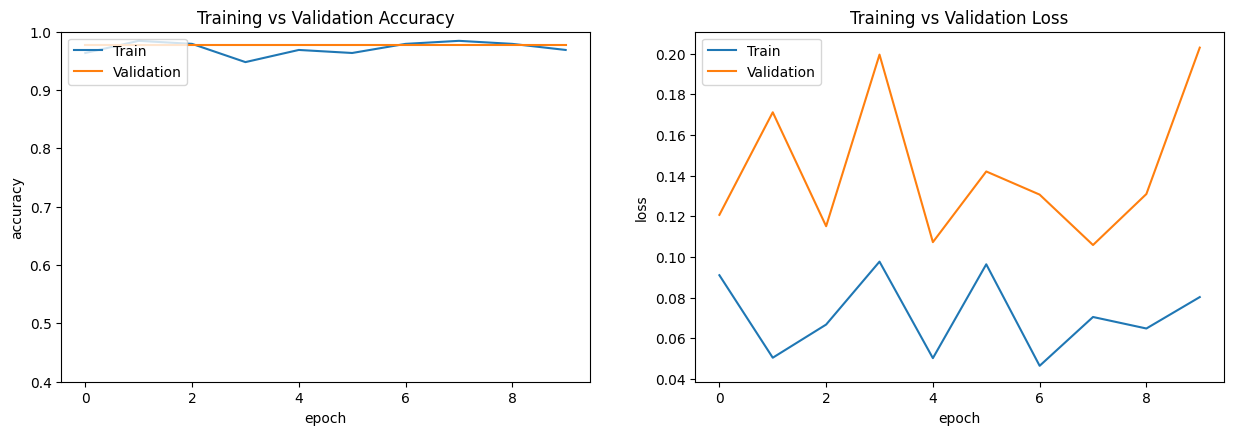

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training Accuracy")
plt.plot(val_accuracy, label = "Validation Accuracy")
plt.ylim(0.4, 1)
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.title("Training vs Validation Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(2, 2, 2)
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.title("Training vs Validation Loss")
plt.xlabel('epoch')
plt.ylabel('loss')

In [26]:
from tensorflow.keras.models import load_model

model = load_model('mammography_pred_model_unbalanced_10epochsX6steps.h5')

In [27]:
pred = model.predict(validation_generator)

547/547 [==============================] - 48s 87ms/step


In [28]:
y_pred = []
for prob in pred:
    if prob >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

pd.Series(y_pred).value_counts()

0    8749
dtype: int64

In [29]:
y_true = validation_generator.classes

Text(50.722222222222214, 0.5, 'Truth')

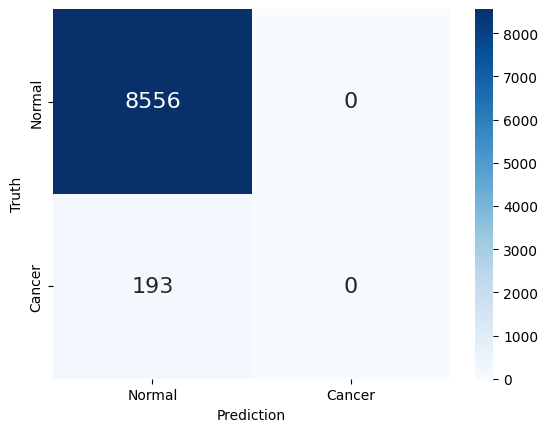

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
class_names = ['Normal', 'Cancer']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8556
           1       0.00      0.00      0.00       193

    accuracy                           0.98      8749
   macro avg       0.49      0.50      0.49      8749
weighted avg       0.96      0.98      0.97      8749



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
